# Building Machine Learning models
### A “model” in machine learning is the output of a machine learning algorithm run on data and represents the rules, numbers, and any other algorithm-specific data structures required to make predictions.

### Import required libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

### Read Preprocessed data

In [74]:
df = pd.read_csv("data/preprocessed_data.csv", index_col=0)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard,IsActiveMember,Exited
RowNumber,,,,,,,,,,,,,,,,,,,,
1,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,0.666667,-0.2,0.50,-0.9,0.1,0.011739,1,0,0,1,0,1,1,1
2,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0.666667,-0.2,0.50,-0.1,0.1,0.125512,0,0,1,1,0,0,1,0
3,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,0.166667,-0.8,0.50,0.9,0.1,0.139630,1,0,0,1,0,1,0,1
4,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0.500000,0.4,0.25,-0.9,-0.1,-0.064717,1,0,0,1,0,0,0,0
5,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0.750000,1.0,0.50,0.5,-0.3,-0.214561,0,0,1,1,0,1,1,0


### Separation of dependent variable from the independent variables

In [75]:
X = df.drop(["Exited"], axis = 1)
y = df["Exited"]

In [76]:
print(X.shape, y.shape)

(10000, 19) (10000,)


In [77]:
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

In [78]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard,IsActiveMember
RowNumber,,,,,,,,,,,,,,,,,,,
1,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,0.666667,-0.2,0.50,-0.9,0.1,0.011739,1,0,0,1,0,1,1
2,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0.666667,-0.2,0.50,-0.1,0.1,0.125512,0,0,1,1,0,0,1
3,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,0.166667,-0.8,0.50,0.9,0.1,0.139630,1,0,0,1,0,1,0
4,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0.500000,0.4,0.25,-0.9,-0.1,-0.064717,1,0,0,1,0,0,0
5,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0.750000,1.0,0.50,0.5,-0.3,-0.214561,0,0,1,1,0,1,1


### Train-test split

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)

## Balancing
### Since it's an unstable data set, we're going to increase the number of samples to balance it by oversampling.

In [80]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [81]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12700, 19) (3114, 19) (12700,) (3114,)


## Modelling

In [82]:
models = []

models.append(('LogisticRegression', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier(random_state = 12345)))
models.append(('RandomForest', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

### Calculate and print Accuracy score for each model

In [83]:
from sklearn.metrics import accuracy_score

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LogisticRegression: (0.771355)
KNN: (0.754335)
DecisionTree: (0.788696)
RandomForest: (0.853243)
SVM: (0.817919)
XGB: (0.893385)
LightGBM: (0.911047)
CatBoost: (0.911047)


## Feature Importance

In [84]:
feature_models = []

feature_models.append(('DecisionTree', DecisionTreeClassifier(random_state = 12345)))
feature_models.append(('RandomForest', RandomForestClassifier(random_state = 12345)))
feature_models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
feature_models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
feature_models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

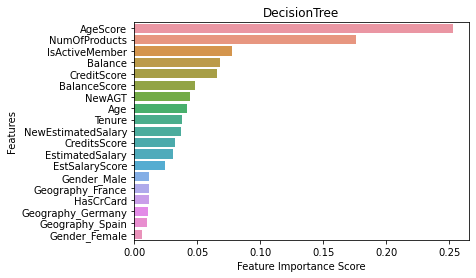

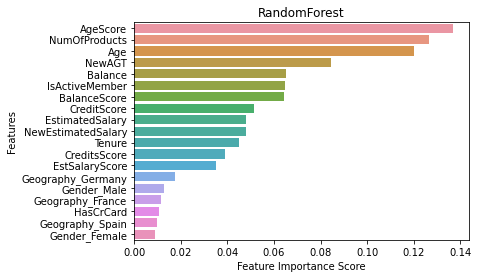

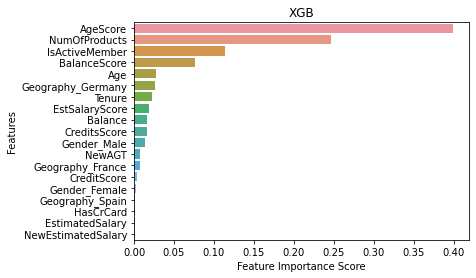

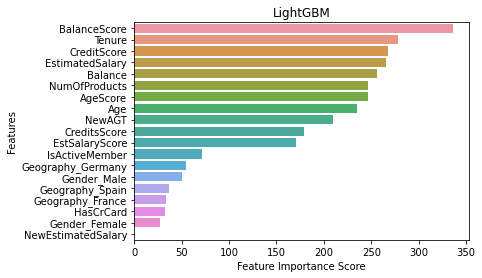

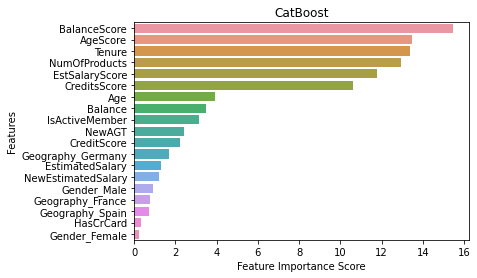

In [85]:
for name, model in feature_models:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title(name)
        plt.show()